
# 作業目標:

利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異


# 作業重點:

[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異 model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理


In [1]:
from keras.utils import np_utils
import numpy as np
import warnings
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings("ignore")
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [4]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [5]:
model = Sequential()

In [6]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [7]:
model.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

In [8]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 300us/step - loss: 0.2588 - acc: 0.9245 - val_loss: 0.1154 - val_acc: 0.9658
Epoch 2/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0971 - acc: 0.9696 - val_loss: 0.0914 - val_acc: 0.9732
Epoch 3/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.0658 - acc: 0.9784 - val_loss: 0.0910 - val_acc: 0.9719
Epoch 4/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0471 - acc: 0.9847 - val_loss: 0.0773 - val_acc: 0.9759
Epoch 5/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0364 - acc: 0.9884 - val_loss: 0.0905 - val_acc: 0.9751
Epoch 6/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0888 - val_acc: 0.9782
Epoch 7/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.1151 - val_a

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

　#以圖形顯示訓練過程

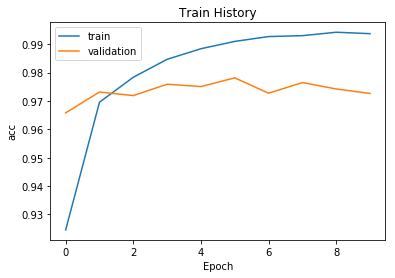

In [13]:
show_train_history(train_history,'acc','val_acc')

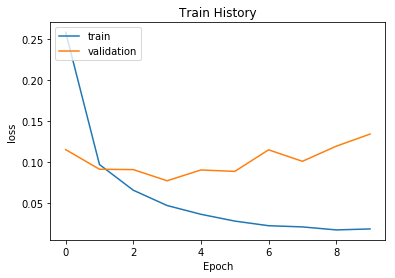

In [14]:
show_train_history(train_history,'loss','val_loss')

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 27us/step

accuracy= 0.976
